In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [2]:
#create a set of random latitude and longitude combitnations
lats = np.random.uniform(low=-90.000,high= 90.000, size=1500)
lngs = np.random.uniform(low=-90.000,high=90.000, size=1500)
lats_lngs=zip(lats,lngs)

In [3]:
coordinates=list(lats_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

uttarkashi in
la palma pa
cape town za
ushuaia ar
port alfred za
mar del plata ar
illoqqortoormiut gl
chuy uy
suzun ru
ushuaia ar
ushuaia ar
taolanaro mg
azangaro pe
marsa matruh eg
saint george bm
manavalakurichi in
saint george bm
barentsburg sj
hermanus za
hithadhoo mv
qaanaaq gl
camacha pt
bambous virieux mu
gat ly
hamilton bm
mubende ug
tamandare br
nizwa om
qaanaaq gl
sargatskoye ru
saint george bm
olafsvik is
sao felix do xingu br
awbari ly
logstor dk
sambava mg
busselton au
illoqqortoormiut gl
ambovombe mg
akyab mm
port alfred za
roros no
arraial do cabo br
clyde river ca
jamestown sh
mar del plata ar
chalmette us
florence us
torbay ca
arraial do cabo br
tres arroyos ar
gibara cu
ushuaia ar
morristown us
bathsheba bb
busselton au
ponta do sol cv
santiago del estero ar
mecca sa
taolanaro mg
pozo colorado py
dikson ru
port elizabeth za
illoqqortoormiut gl
plettenberg bay za
pangnirtung ca
mahebourg mu
nadvoitsy ru
awbari ly
san cristobal ec
maxixe mz
san luis ar
rocha uy
isla muj

caravelas br
mogadishu so
barcelos br
georgetown sh
ushuaia ar
vandoeuvre-les-nancy fr
bolungarvik is
madimba tz
kutum sd
neuquen ar
skjervoy no
manjeshwar in
mahebourg mu
saldanha za
saint-joseph re
georgetown sh
saldanha za
longonjo ao
jamestown sh
arraial do cabo br
ponta do sol cv
leshukonskoye ru
taolanaro mg
sayyan ye
ushuaia ar
balykshi kz
bredasdorp za
jamestown sh
east london za
aksay kz
ilulissat gl
rawson ar
shubarshi kz
barentsburg sj
jalu ly
bolshoye soldatskoye ru
masuguru tz
izhmorskiy ru
morondava mg
narsaq gl
ribeira grande pt
attawapiskat ca
bokspits bw
porto santo pt
port alfred za
saint-joseph re
klaksvik fo
olafsvik is
hermanus za
aksarka ru
hambantota lk
caconda ao
sao joao da barra br
lere ng
port-gentil ga
port alfred za
mariental na
kalabo zm
amderma ru
hermanus za
ushuaia ar
suez eg
gueret fr
raudeberg no
illoqqortoormiut gl
bengkulu id
souillac mu
barentsburg sj
illoqqortoormiut gl
marzuq ly
solwezi zm
busselton au
zaysan kz
hermanus za
jamestown sh
manitouwa

taolanaro mg
dondo mz
arraial do cabo br
ushuaia ar
toulepleu ci
dzilam gonzalez mx
port elizabeth za
cape town za
cape town za
santa maria da boa vista br
berlevag no
ushuaia ar
savinka ru
ushuaia ar
los llanos de aridane es
port alfred za
bar harbor us
upernavik gl
sitamau in
upernavik gl
taolanaro mg
salalah om
coquimbo cl
okakarara na
tshikapa cd
ushuaia ar
cayenne gf
kralendijk an
jamestown sh
ushuaia ar
illoqqortoormiut gl
cape town za
saint-georges gf
ushuaia ar
cape town za
coihaique cl
bredasdorp za
cape town za
bredasdorp za
makokou ga
bengkulu id
ushuaia ar
tanda ci
opuwo na
illoqqortoormiut gl
tasiilaq gl
tasiilaq gl
dikson ru
bredasdorp za
qaanaaq gl
souillac mu
mahebourg mu
taolanaro mg
qaanaaq gl
quepos cr
port-gentil ga
arraial do cabo br
punta arenas cl
constitucion cl
humaita br
bredasdorp za
los llanos de aridane es
panjab af
clyde river ca
ratnagiri in
arraial do cabo br
ushuaia ar
cockburn town tc
ushuaia ar
atbasar kz
taolanaro mg
surt ly
qaanaaq gl
biltine td
mog

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [6]:
url="https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=85e88150062045398183e4ab76ba60d3


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=85e88150062045398183e4ab76ba60d3&q=Boston


In [8]:
city_weather=requests.get(city_url)
city_weather

<Response [200]>

In [9]:
city_weather.status_code

200

In [10]:
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":57.78,"feels_like":56.97,"temp_min":55.99,"temp_max":59,"pressure":1025,"humidity":100},"visibility":10000,"wind":{"speed":5.82,"deg":80},"clouds":{"all":51},"dt":1603267578,"sys":{"type":1,"id":4967,"country":"US","sunrise":1603278272,"sunset":1603317162},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [11]:
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 57.78,
  'feels_like': 56.97,
  'temp_min': 55.99,
  'temp_max': 59,
  'pressure': 1025,
  'humidity': 100},
 'visibility': 10000,
 'wind': {'speed': 5.82, 'deg': 80},
 'clouds': {'all': 51},
 'dt': 1603267578,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1603278272,
  'sunset': 1603317162},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
boston_data = city_weather.json()
boston_data["sys"]

{'type': 1,
 'id': 4967,
 'country': 'US',
 'sunrise': 1603278272,
 'sunset': 1603317162}

In [13]:
boston_data["sys"]["country"]

'US'

In [14]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 59 100 51 5.82


In [15]:
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 10, 21, 8, 6, 18)

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | uttarkashi
Processing Record 2 of Set 1 | la palma
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | suzun
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | azangaro
Processing Record 12 of Set 1 | marsa matruh
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | manavalakurichi
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | camacha
Processing Record 20 of Set 1 | bambous virieux
Processin

Processing Record 38 of Set 4 | barbar
City not found. Skipping...
Processing Record 39 of Set 4 | kutum
Processing Record 40 of Set 4 | urazovo
Processing Record 41 of Set 4 | vasai
Processing Record 42 of Set 4 | cockburn town
Processing Record 43 of Set 4 | lamu
Processing Record 44 of Set 4 | buraydah
Processing Record 45 of Set 4 | thohoyandou
Processing Record 46 of Set 4 | buchanan
Processing Record 47 of Set 4 | esfarayen
Processing Record 48 of Set 4 | diamantino
Processing Record 49 of Set 4 | subotica
Processing Record 50 of Set 4 | shahrud
Processing Record 1 of Set 5 | ribeira grande
Processing Record 2 of Set 5 | igarka
Processing Record 3 of Set 5 | ostrovnoy
Processing Record 4 of Set 5 | kismayo
Processing Record 5 of Set 5 | huarmey
Processing Record 6 of Set 5 | virginia beach
Processing Record 7 of Set 5 | beloha
Processing Record 8 of Set 5 | bengkulu
Processing Record 9 of Set 5 | ituni
City not found. Skipping...
Processing Record 10 of Set 5 | qasigiannguit
Proc

Processing Record 25 of Set 8 | shubarshi
Processing Record 26 of Set 8 | bolshoye soldatskoye
City not found. Skipping...
Processing Record 27 of Set 8 | masuguru
Processing Record 28 of Set 8 | izhmorskiy
Processing Record 29 of Set 8 | morondava
Processing Record 30 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 31 of Set 8 | porto santo
Processing Record 32 of Set 8 | hambantota
Processing Record 33 of Set 8 | caconda
Processing Record 34 of Set 8 | lere
Processing Record 35 of Set 8 | port-gentil
Processing Record 36 of Set 8 | mariental
Processing Record 37 of Set 8 | kalabo
Processing Record 38 of Set 8 | suez
Processing Record 39 of Set 8 | gueret
Processing Record 40 of Set 8 | raudeberg
Processing Record 41 of Set 8 | marzuq
Processing Record 42 of Set 8 | solwezi
Processing Record 43 of Set 8 | zaysan
Processing Record 44 of Set 8 | manitouwadge
Processing Record 45 of Set 8 | mirnyy
Processing Record 46 of Set 8 | diego de almagro
Processing Record 47

Processing Record 11 of Set 12 | norrtalje
Processing Record 12 of Set 12 | ludvika
Processing Record 13 of Set 12 | berlevag
Processing Record 14 of Set 12 | albanel
Processing Record 15 of Set 12 | do gonbadan
Processing Record 16 of Set 12 | volokolamsk
Processing Record 17 of Set 12 | viligili
City not found. Skipping...
Processing Record 18 of Set 12 | angra
City not found. Skipping...
Processing Record 19 of Set 12 | paradwip
City not found. Skipping...
Processing Record 20 of Set 12 | plouzane
Processing Record 21 of Set 12 | den helder
Processing Record 22 of Set 12 | baijiantan
Processing Record 23 of Set 12 | jamui
Processing Record 24 of Set 12 | karpogory
Processing Record 25 of Set 12 | shepsi
Processing Record 26 of Set 12 | rochegda
Processing Record 27 of Set 12 | ozgon
City not found. Skipping...
Processing Record 28 of Set 12 | dzilam gonzalez
Processing Record 29 of Set 12 | havre-saint-pierre
Processing Record 30 of Set 12 | leon
Processing Record 31 of Set 12 | don

In [17]:
len(city_data)

546

In [18]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Uttarkashi,30.73,78.45,86.00,37,20,5.82,IN,2020-10-21 08:10:14
1,La Palma,33.85,-118.05,66.99,88,90,4.70,US,2020-10-21 08:07:33
2,Cape Town,-33.93,18.42,64.99,59,0,18.34,ZA,2020-10-21 08:06:47
3,Ushuaia,-54.80,-68.30,41.00,65,40,11.41,AR,2020-10-21 08:10:15
4,Port Alfred,-33.59,26.89,66.72,48,0,6.62,ZA,2020-10-21 08:10:16
5,Mar Del Plata,-38.00,-57.56,52.00,93,0,6.46,AR,2020-10-21 08:07:14
6,Chuy,-33.70,-53.46,56.95,74,70,12.01,UY,2020-10-21 08:10:17
7,Suzun,53.78,82.31,53.64,40,56,8.63,RU,2020-10-21 08:10:17
8,Azangaro,-14.92,-70.22,41.74,74,98,3.24,PE,2020-10-21 08:10:18
9,Marsa Matruh,31.35,27.25,75.20,60,40,9.17,EG,2020-10-21 08:10:19


In [19]:
city_data_df=city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]

In [20]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Uttarkashi,IN,2020-10-21 08:10:14,30.73,78.45,86.00,37,20,5.82
1,La Palma,US,2020-10-21 08:07:33,33.85,-118.05,66.99,88,90,4.70
2,Cape Town,ZA,2020-10-21 08:06:47,-33.93,18.42,64.99,59,0,18.34
3,Ushuaia,AR,2020-10-21 08:10:15,-54.80,-68.30,41.00,65,40,11.41
4,Port Alfred,ZA,2020-10-21 08:10:16,-33.59,26.89,66.72,48,0,6.62


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
today = time.strftime("%x")
today


'10/21/20'

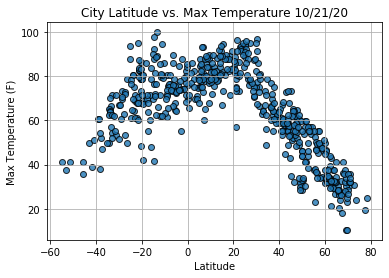

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

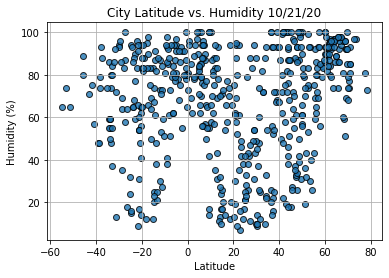

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

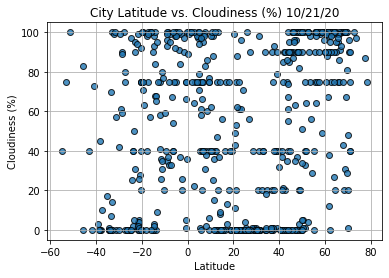

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

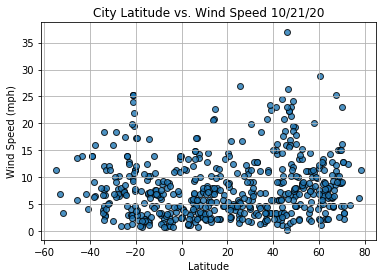

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()